In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
data=pd.read_csv('vehicles_dataset.csv')

# Getting to know the dataset


#### Data Wrangling

In [147]:
data.size

18036

In [148]:
data.shape

(1002, 18)

In [149]:
data.columns

Index(['name', 'description', 'make', 'model', 'type', 'year', 'price',
       'engine', 'cylinders', 'fuel', 'mileage', 'transmission', 'trim',
       'body', 'doors', 'exterior_color', 'interior_color', 'drivetrain'],
      dtype='object')

In [150]:
data.describe()

,year,price,cylinders,mileage,doors
count,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000
mean,2023.916168,50202.985700,4.975474,1770.185144,3.943719
std,0.298109,18484.303914,1.317469,9095.197305,0.273447
min,2023.000000,0.000000,0.000000,0.000000,2.000000
25%,2024.000000,36900.000000,4.000000,4.000000,4.000000
50%,2024.000000,47340.000000,4.000000,9.000000,4.000000
75%,2024.000000,58717.250000,6.000000,14.000000,4.000000
max,2025.000000,195895.000000,8.000000,50202.985700,5.000000


In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     1002 non-null   object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   type            1002 non-null   object 
 5   year            1002 non-null   int64  
 6   price           1002 non-null   float64
 7   engine          1002 non-null   object 
 8   cylinders       1002 non-null   float64
 9   fuel            1002 non-null   object 
 10  mileage         1002 non-null   float64
 11  transmission    1002 non-null   object 
 12  trim            1002 non-null   object 
 13  body            1002 non-null   object 
 14  doors           1002 non-null   float64
 15  exterior_color  1002 non-null   object 
 16  interior_color  1002 non-null   object 
 17  drivetrain      1002 non-null   o

# Data cleaning

In [153]:
data['interior_color'].fillna('',inplace=True)

In [154]:
data['exterior_color'].fillna('',inplace=True)

In [155]:
data['description'].fillna('',inplace=True)

In [156]:
data['price'].fillna(data['price'].mean(),inplace=True)

In [157]:
data['mileage'].fillna(data['price'].mean(),inplace=True)

In [158]:
data.isnull().sum()

name              0
description       0
make              0
model             0
type              0
year              0
price             0
engine            0
cylinders         0
fuel              0
mileage           0
transmission      0
trim              0
body              0
doors             0
exterior_color    0
interior_color    0
drivetrain        0
dtype: int64

In [159]:
data['doors'].fillna(data['doors'].mean(),inplace=True)
data['body'].fillna('',inplace=True)
data['trim'].fillna('',inplace=True)
data['transmission'].fillna('',inplace=True)
data['cylinders'].fillna(data['cylinders'].mean(),inplace=True)
data['engine'].fillna('',inplace=True)
data['fuel'].fillna('',inplace=True)

In [99]:
data.isnull().sum()

name              0
description       0
make              0
model             0
type              0
year              0
price             0
engine            0
cylinders         0
fuel              0
mileage           0
transmission      0
trim              0
body              0
doors             0
exterior_color    0
interior_color    0
drivetrain        0
dtype: int64

In [164]:
data.drop_duplicates(inplace = True)  


# data visualization

<Axes: >

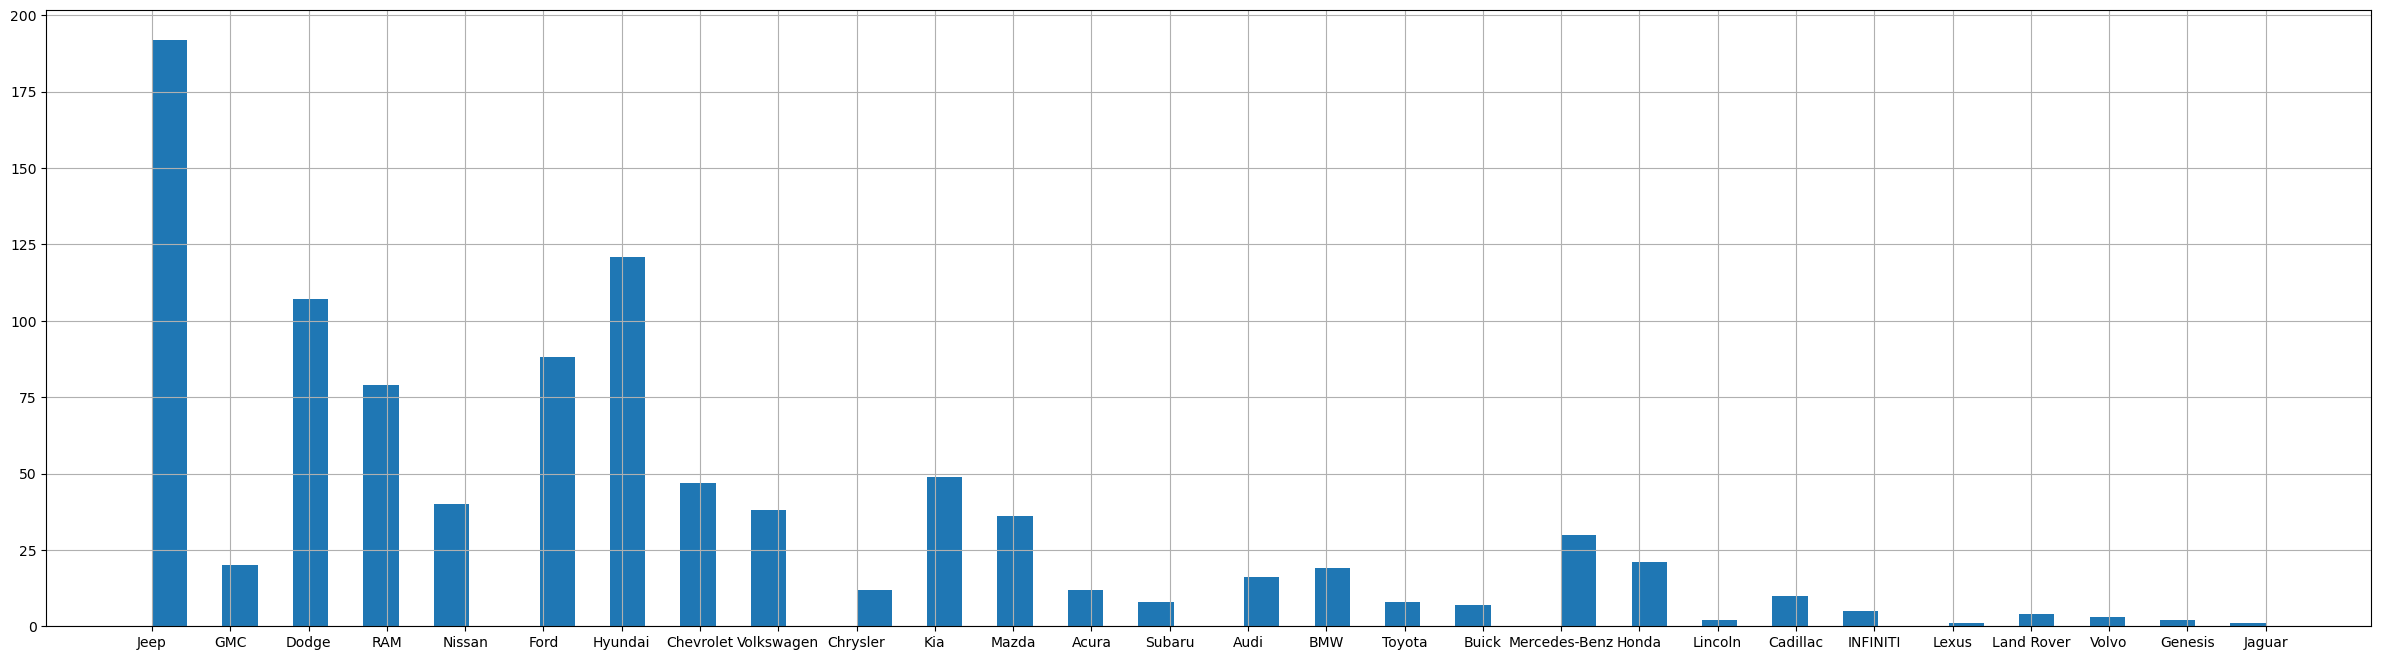

In [165]:
plt.figure(figsize=(30,8))
data['make'].hist(bins=60)

<Axes: xlabel='year', ylabel='price'>

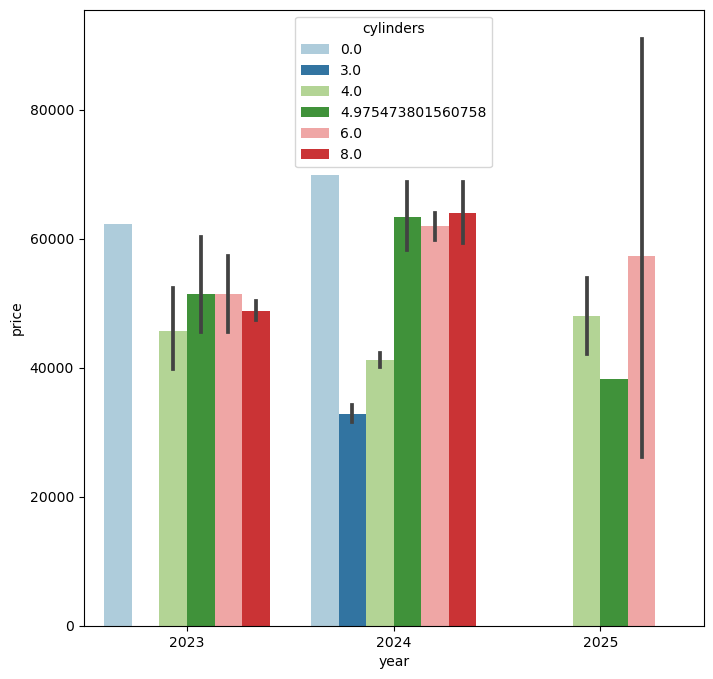

In [100]:
plt.figure(figsize=(8,8))
sns.barplot(x='year',y='price',data=data,hue='cylinders',palette='Paired')

In [114]:
data['make'].value_counts()

make
Jeep             194
Hyundai          121
Dodge            117
Ford              88
RAM               79
Kia               52
Chevrolet         49
Nissan            40
Volkswagen        38
Mazda             38
Mercedes-Benz     30
GMC               23
Honda             22
BMW               19
Audi              16
Acura             12
Chrysler          12
Cadillac          10
Subaru             8
Toyota             8
Buick              8
INFINITI           5
Land Rover         4
Volvo              3
Lincoln            2
Genesis            2
Lexus              1
Jaguar             1
Name: count, dtype: int64

<Axes: xlabel='make', ylabel='count'>

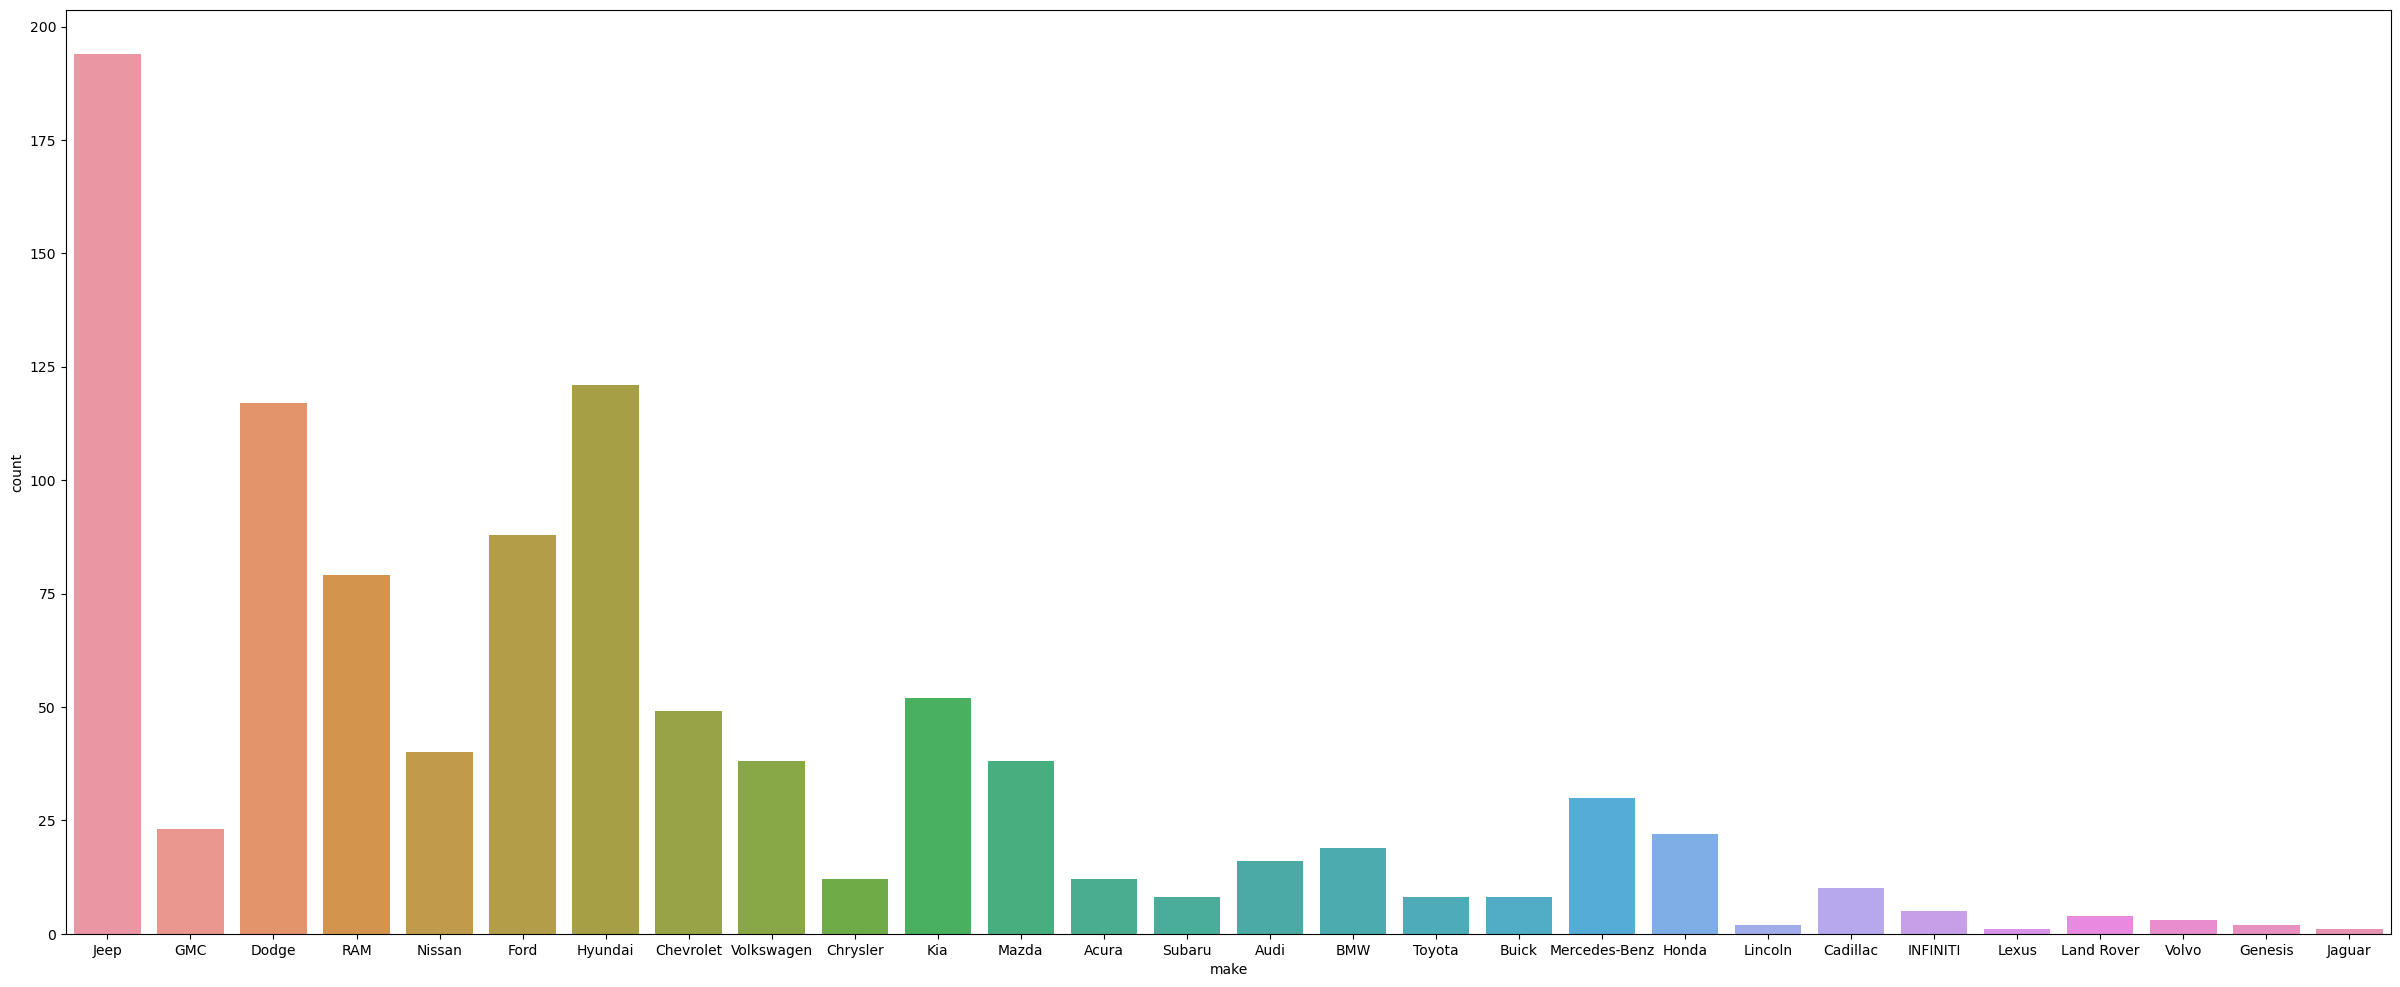

In [116]:
plt.figure(figsize=(30,12))
sns.countplot(x='make',data=data)

<Axes: xlabel='make', ylabel='price'>

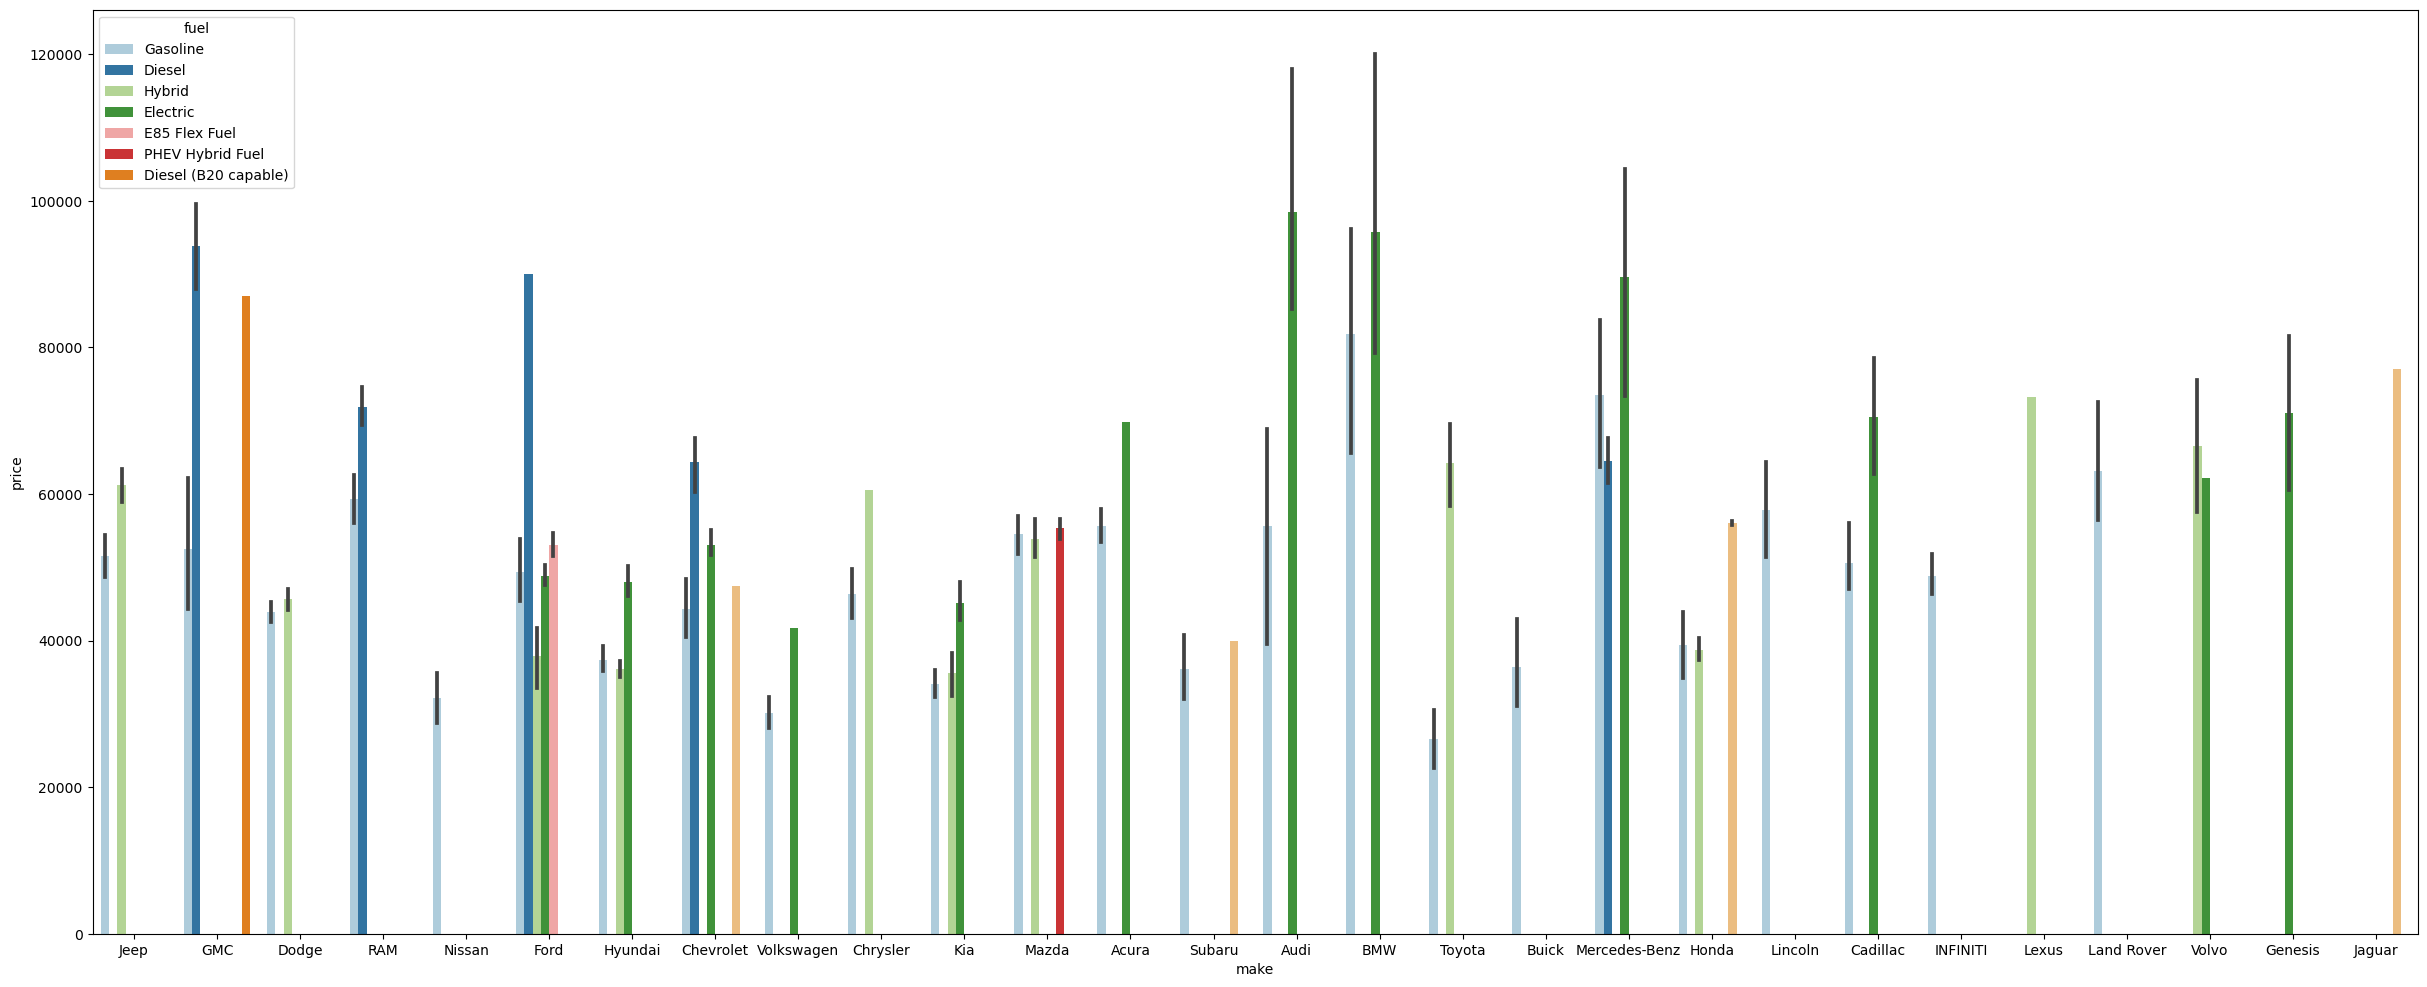

In [118]:
plt.figure(figsize=(30,12))
sns.barplot(x='make',y='price',data=data,hue='fuel',palette='Paired')

In [122]:
Top_10_models=data.groupby('model').size().sort_values(ascending=False).head(10)
Top_10_models=data.loc[data['model'].isin(Top_10_models.index)].sort_values('model')
Top_10_models

,name,description,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
865,2024 RAM 3500 Tradesman,\n \n This Ram 3500 boasts a Inter...,RAM,3500,New,2024,60925.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,Automatic,Tradesman,Pickup Truck,4.0,Delmonico Red Pearlcoat,Black,Four-wheel Drive
95,2024 RAM 3500 Tradesman Crew Cab 4x4 8' Box,Bright White Clearcoat 2024 Ram 3500 Tradesman...,RAM,3500,New,2024,66334.0,"High Output 6.7L I-6 diesel direct injection, ...",6.0,Diesel,6.0,Automatic,Tradesman Crew Cab 4x4 8&#39; Box,Pickup Truck,4.0,Bright White Clearcoat,Black Interior Color,Four-wheel Drive
98,2024 RAM 3500 Tradesman,\n \n .\n \n,RAM,3500,New,2024,65315.0,24V DDI OHV Turbo Diesel,6.0,Diesel,9.0,6-Speed Automatic,Tradesman,Pickup Truck,4.0,Bright White Clearcoat,Black,Four-wheel Drive
303,2024 RAM 3500 Tradesman Crew Cab 4x4 8' Box,Granite Crystal Metallic Clearcoat 2024 Ram 35...,RAM,3500,New,2024,67237.0,"High Output 6.7L I-6 diesel direct injection, ...",6.0,Diesel,6.0,Automatic,Tradesman Crew Cab 4x4 8&#39; Box,Pickup Truck,4.0,Granite Crystal Metallic Clearcoat,Black Interior Color,Four-wheel Drive
965,2024 RAM 3500 Laramie Crew Cab 4x4 8' Box,Pearl White 2024 Ram 3500 Laramie 4WD 6-Speed ...,RAM,3500,New,2024,80927.0,"6.7L I-6 diesel direct injection, VVT intercoo...",6.0,Diesel,11.0,Automatic,Laramie Crew Cab 4x4 8&#39; Box,Pickup Truck,4.0,White,Black,Four-wheel Drive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,2024 Hyundai Tucson Hybrid SEL Convenience,\n \n I4. This 2024 Hyundai Tucson...,Hyundai,Tucson Hybrid,New,2024,36280.0,16V GDI DOHC Turbo Hybrid,4.0,Hybrid,241.0,6-Speed Automatic,SEL Convenience,SUV,4.0,Shimmering Silver,Gray,All-wheel Drive
333,2024 Hyundai Tucson Hybrid SEL Convenience,\n \n Tucson Hybrid SEL Convenienc...,Hyundai,Tucson Hybrid,New,2024,36882.0,16V GDI DOHC Turbo Hybrid,4.0,Hybrid,11.0,6-Speed Automatic,SEL Convenience,SUV,4.0,White Pearl,Gray,All-wheel Drive
595,2024 Hyundai Tucson Hybrid SEL Convenience,\n \n I4. Black Pearl 2024 Hyundai...,Hyundai,Tucson Hybrid,New,2024,35744.0,16V GDI DOHC Turbo Hybrid,4.0,Hybrid,15.0,6-Speed Automatic,SEL Convenience,SUV,4.0,Black Pearl,Gray,All-wheel Drive
220,2024 Hyundai Tucson Hybrid SEL Convenience,"$1,771 off MSRP! SEL Convenience I4. 37/36 Cit...",Hyundai,Tucson Hybrid,New,2024,35404.0,16V GDI DOHC Turbo Hybrid,4.0,Hybrid,10.0,6-Speed Automatic,SEL Convenience,SUV,4.0,White,Black,All-wheel Drive


<Axes: xlabel='make', ylabel='price'>

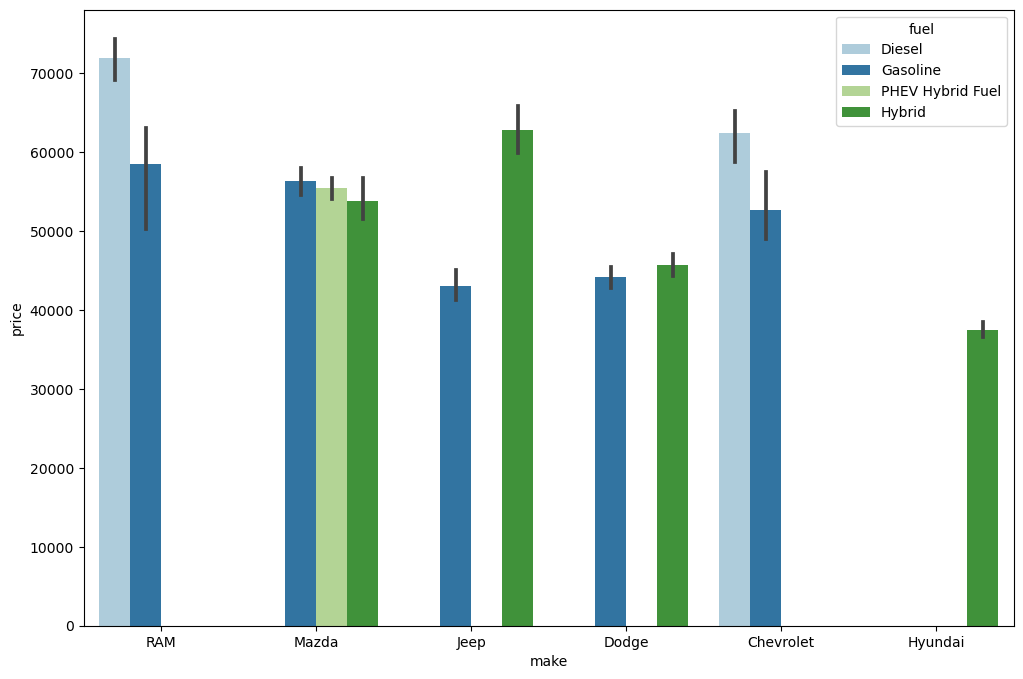

In [125]:
plt.figure(figsize=(12,8))
sns.barplot(x='make',y='price',data=Top_10_models,hue='fuel',palette='Paired')

In [137]:
Top_10_color=data.groupby('exterior_color').size().sort_values(ascending=False).head(10)
Top_10_color=data.loc[data['exterior_color'].isin(Top_10_color.index)].sort_values('exterior_color')
Top_10_color

,name,description,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
180,2024 BMW i4 Gran Coupe eDrive40,"\n \n Heated Seats, NAV, Sunroof, ...",BMW,i4 Gran Coupe,New,2024,69685.0,c,4.975474,Electric,5.0,1-Speed Automatic,eDrive40,Hatchback,4.0,Black,Tacora Red,Rear-wheel Drive
324,2024 Ford Edge ST-Line,\n \n EDGE AWD-ST LINE 2024 MODEL ...,Ford,Edge,New,2024,42715.0,16V GDI DOHC Turbo,4.000000,Gasoline,2.0,8-Speed Automatic,ST-Line,SUV,4.0,Black,Ebony,All-wheel Drive
138,2024 Nissan Altima 2.5 SV,\n \n Doggett Nissan is proud to p...,Nissan,Altima,New,2024,31225.0,16V GDI DOHC,4.000000,Gasoline,6.0,Automatic CVT,2.5 SV,Sedan,4.0,Black,Charcoal,Front-wheel Drive
68,2024 Hyundai IONIQ 5 SE,\n \n Country Hyundai is part of t...,Hyundai,IONIQ 5,New,2024,42015.0,c,4.975474,Electric,7.0,1-Speed Automatic,SE,SUV,4.0,Black,Black,All-wheel Drive
71,2024 Acura MDX Base,Black 2024 Acura MDX 3.5L 10-Speed Automatic V...,Acura,MDX,New,2024,51645.0,24V GDI SOHC,6.000000,Gasoline,5.0,10-Speed Automatic,Base,SUV,4.0,Black,,Front-wheel Drive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,2024 RAM 3500 Big Horn,\n \n Arrive in style with our Die...,RAM,3500,New,2024,69697.0,24V DDI OHV Turbo Diesel,6.000000,Diesel,2.0,Automatic,Big Horn,Pickup Truck,4.0,White,Black / Diesel Gray,Four-wheel Drive
708,2024 Kia Seltos S,\n \n MSRP does not include added ...,Kia,Seltos,New,2024,28535.0,16V MPFI DOHC,4.000000,Gasoline,15.0,Automatic CVT,S,SUV,4.0,White,,All-wheel Drive
688,2024 Hyundai Elantra HEV Limited,\n \n The Preston Autoplex is plea...,Hyundai,Elantra HEV,New,2024,30870.0,16V GDI DOHC Hybrid,4.000000,Hybrid,9.0,Automatic,Limited,Sedan,4.0,White,Black,Front-wheel Drive
404,2023 Dodge Charger SXT,"\n \n Heated Seats, Moonroof, Onbo...",Dodge,Charger,New,2023,36083.0,24V MPFI DOHC,6.000000,Gasoline,20.0,8-Speed Automatic,SXT,Sedan,4.0,White,Black,Rear-wheel Drive


<Axes: xlabel='exterior_color', ylabel='price'>

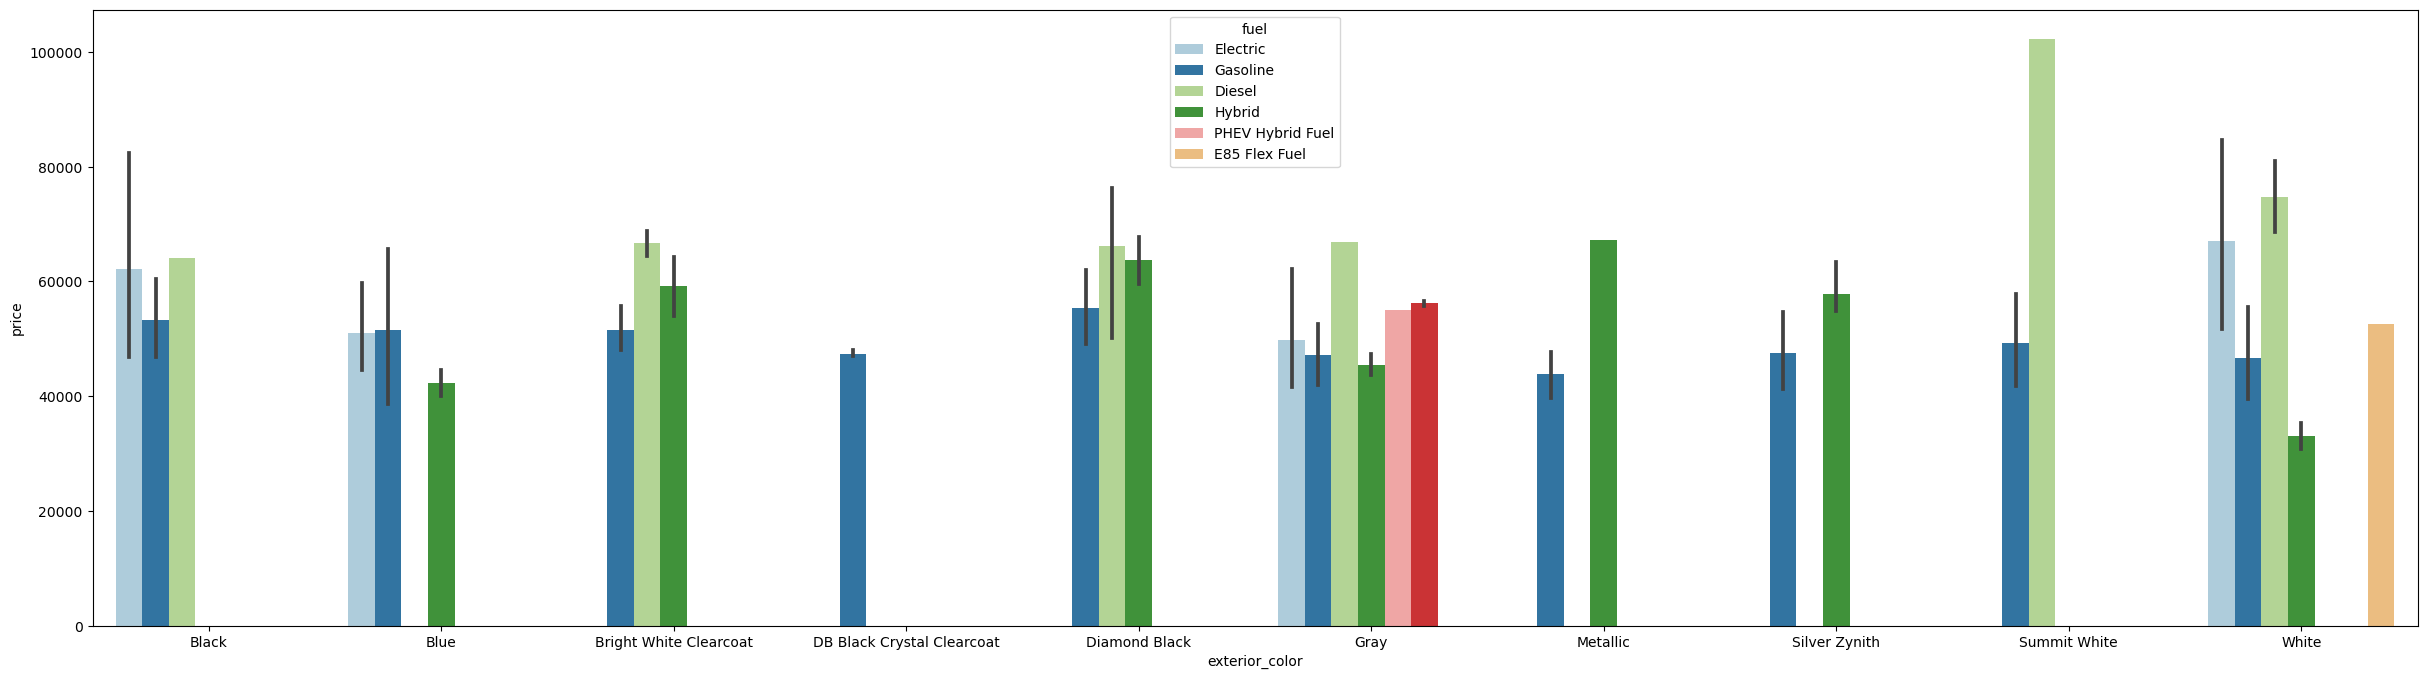

In [140]:
plt.figure(figsize=(30,8))
sns.barplot(x='exterior_color',y='price',data=Top_10_color,hue='fuel',palette='Paired')

<Axes: xlabel='exterior_color', ylabel='count'>

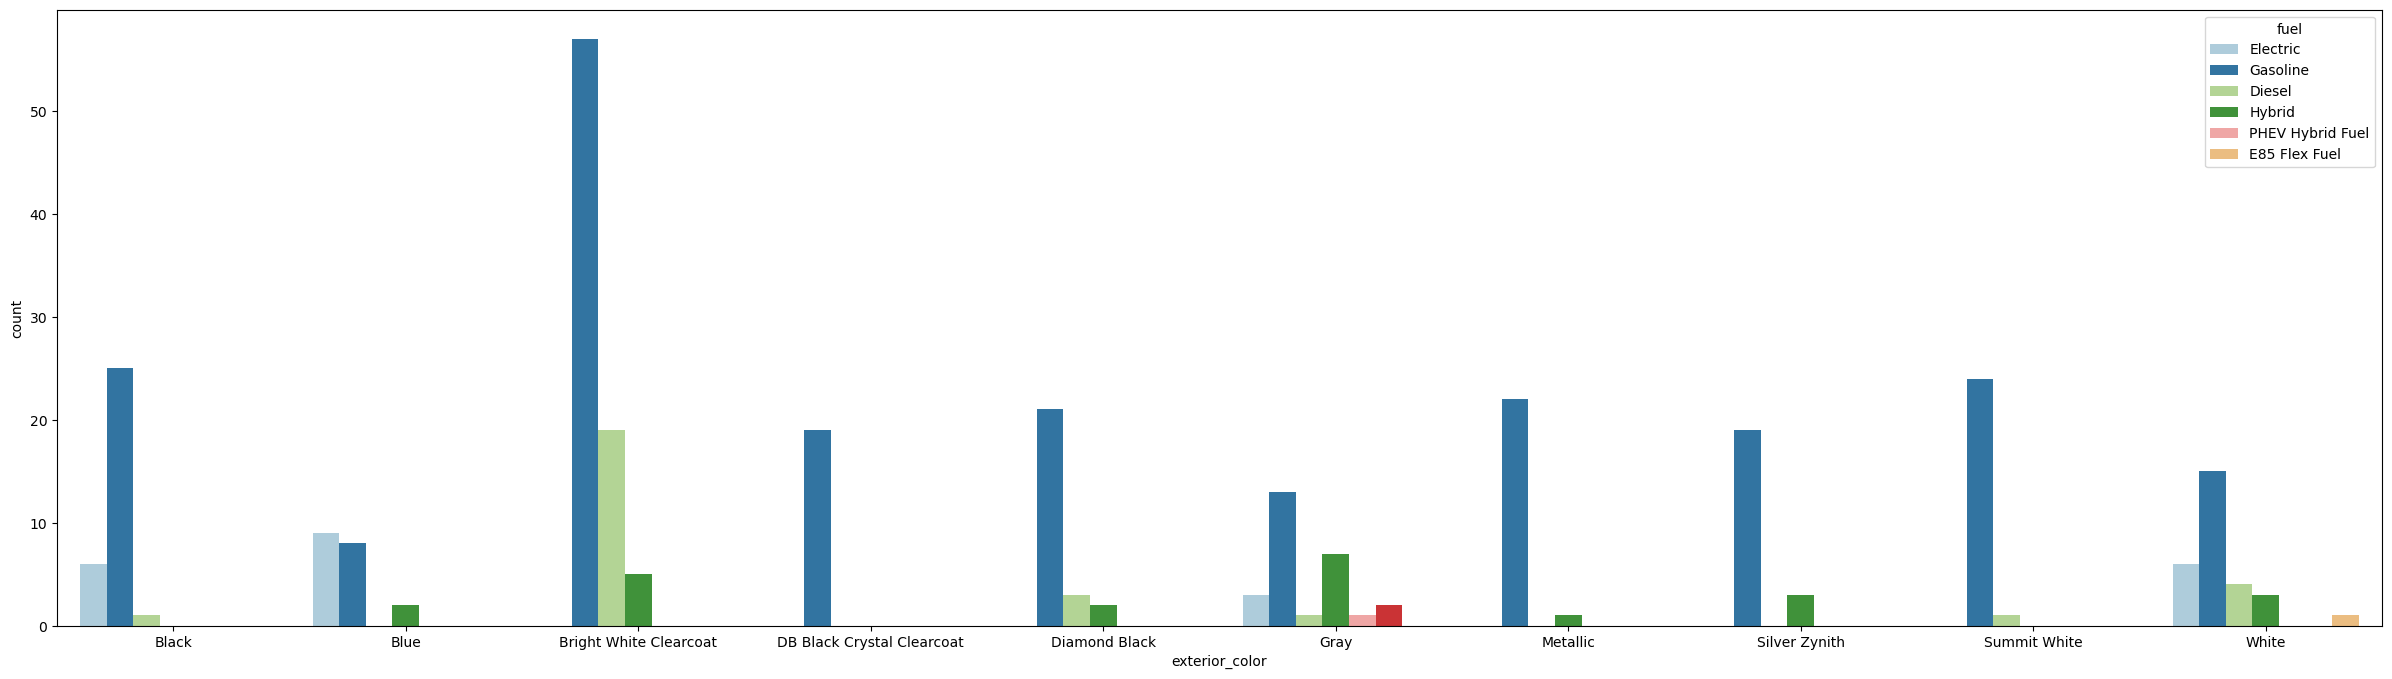

In [142]:
plt.figure(figsize=(30,8))
sns.countplot(x='exterior_color',data=Top_10_color,hue='fuel',palette='Paired')